In [1]:
from google.colab import files
files.upload()  # Select and upload kaggle.json from your computer


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"atickishrak2008059","key":"4039c2d05ec8f04d1bbb1aa9d80ebfdd"}'}

In [3]:
!pip install kaggle  # Install Kaggle package
!mkdir ~/.kaggle  # Create a directory for Kaggle API
!cp kaggle.json ~/.kaggle/  # Move kaggle.json to the directory
!chmod 600 ~/.kaggle/kaggle.json  # Set permissions
!pip install kagglehub



mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("aneesh10/cricket-shot-dataset")

print("Path to dataset files:", path)


100%|██████████| 645M/645M [00:32<00:00, 20.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/aneesh10/cricket-shot-dataset/versions/2


In [8]:
import os

dataset_dir = "/root/.cache/kagglehub/datasets/aneesh10/cricket-shot-dataset/versions/2"
print("Files in dataset directory:", os.listdir(dataset_dir))


Files in dataset directory: ['data']


In [10]:
import os

data_folder = "/root/.cache/kagglehub/datasets/aneesh10/cricket-shot-dataset/versions/2/data"
print("Files in 'data' folder:", os.listdir(data_folder))


Files in 'data' folder: ['drive', 'pullshot', 'sweep', 'legglance-flick']


In [11]:
import shutil

destination = "/content/cricket_shots"
shutil.move(data_folder, destination)

print("Dataset moved to:", destination)
print("Updated dataset files:", os.listdir(destination))


Dataset moved to: /content/cricket_shots
Updated dataset files: ['drive', 'pullshot', 'sweep', 'legglance-flick']


In [12]:
import os

dataset_path = "/content/cricket_shots"

# List all subfolders (categories)
categories = os.listdir(dataset_path)
print("Cricket shot categories:", categories)


Cricket shot categories: ['drive', 'pullshot', 'sweep', 'legglance-flick']


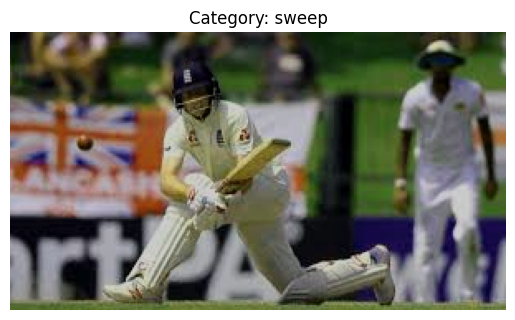

In [24]:
import matplotlib.pyplot as plt
import cv2
import random

# Select a random category
random_category = random.choice(categories)
category_path = os.path.join(dataset_path, random_category)

# Select a random image from this category
random_image = random.choice(os.listdir(category_path))
image_path = os.path.join(category_path, random_image)

# Load and display the image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct colors

plt.imshow(image)
plt.title(f"Category: {random_category}")
plt.axis("off")
plt.show()


In [25]:
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split

# Define image size
IMAGE_SIZE = (128, 128)

# Prepare data lists
X = []  # Image data
Y = []  # Labels

# Assign numerical labels to each category
label_map = {category: idx for idx, category in enumerate(categories)}

# Load images and convert to arrays
for category in categories:
    category_path = os.path.join(dataset_path, category)
    label = label_map[category]  # Get label

    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        image = load_img(img_path, target_size=IMAGE_SIZE)  # Load & resize
        image = img_to_array(image) / 255.0  # Convert to array & normalize

        X.append(image)
        Y.append(label)

# Convert to NumPy arrays
X = np.array(X)
Y = np.array(Y)

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Dataset prepared successfully!")
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")


Dataset prepared successfully!
Training samples: 3779, Testing samples: 945


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(categories), activation='softmax')  # Output layer with class count
])

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

print("Model built successfully!")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model built successfully!


In [27]:
# Train the model
history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))


Epoch 1/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.4124 - loss: 1.6028 - val_accuracy: 0.7683 - val_loss: 0.6218
Epoch 2/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8440 - loss: 0.4553 - val_accuracy: 0.8561 - val_loss: 0.4292
Epoch 3/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9423 - loss: 0.1606 - val_accuracy: 0.8635 - val_loss: 0.4436
Epoch 4/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9758 - loss: 0.0774 - val_accuracy: 0.8688 - val_loss: 0.4903
Epoch 5/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9930 - loss: 0.0327 - val_accuracy: 0.8698 - val_loss: 0.4518
Epoch 6/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9953 - loss: 0.0178 - val_accuracy: 0.8667 - val_loss: 0.5201
Epoch 7/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9893 - loss: 0.0427 - val_accuracy: 0.8783 - val_loss: 0.4940
Epoch 8/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9980 - loss: 0.0105 - val_acc

FileUpload(value={}, accept='image/*', description='Upload')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


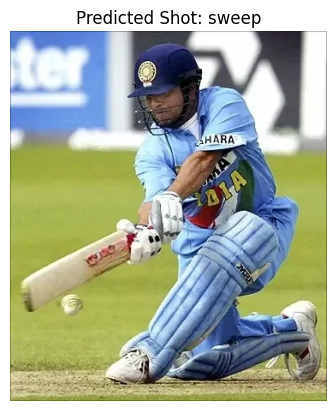

In [29]:
import ipywidgets as widgets
from IPython.display import display
from google.colab import files

# File uploader widget
upload_button = widgets.FileUpload(accept='image/*', multiple=False)

def on_upload_change(change):
    if upload_button.value:
        # Get uploaded file
        uploaded_file = list(upload_button.value.values())[0]
        image_path = uploaded_file['metadata']['name']

        # Save file temporarily
        with open(image_path, 'wb') as f:
            f.write(uploaded_file['content'])

        # Predict the cricket shot
        predict_cricket_shot(image_path)

# Attach event listener
upload_button.observe(on_upload_change, names='value')

# Display the upload button
display(upload_button)


In [30]:
from google.colab import drive
drive.mount('/content/drive')
!mkdir -p "/content/drive/My Drive/Cricket-Shot-Prediction"
!cp -r /content/your_project_folder "/content/drive/My Drive/Cricket-Shot-Prediction"


Mounted at /content/drive
cp: cannot stat '/content/your_project_folder': No such file or directory
